In [32]:
import sys

sys.path.append("..")

In [33]:
from nrc import NoisyRingsClustering
from experiments.datagen import random_circles, random_noise
import numpy as np
import matplotlib.pyplot as plt
from experiments.draw import plot_results
from experiments.colors import get_vibrant_colors
from experiments.utils import save_experiment

plt.rcParams["figure.dpi"] = 600
plt.rcParams["figure.figsize"] = (8, 8)

INFO:nrc.fuzzycmeans:[FuzzyCMeans] Converged after 7 iterations. Stopping early.
INFO:nrc:Total noise samples: 0


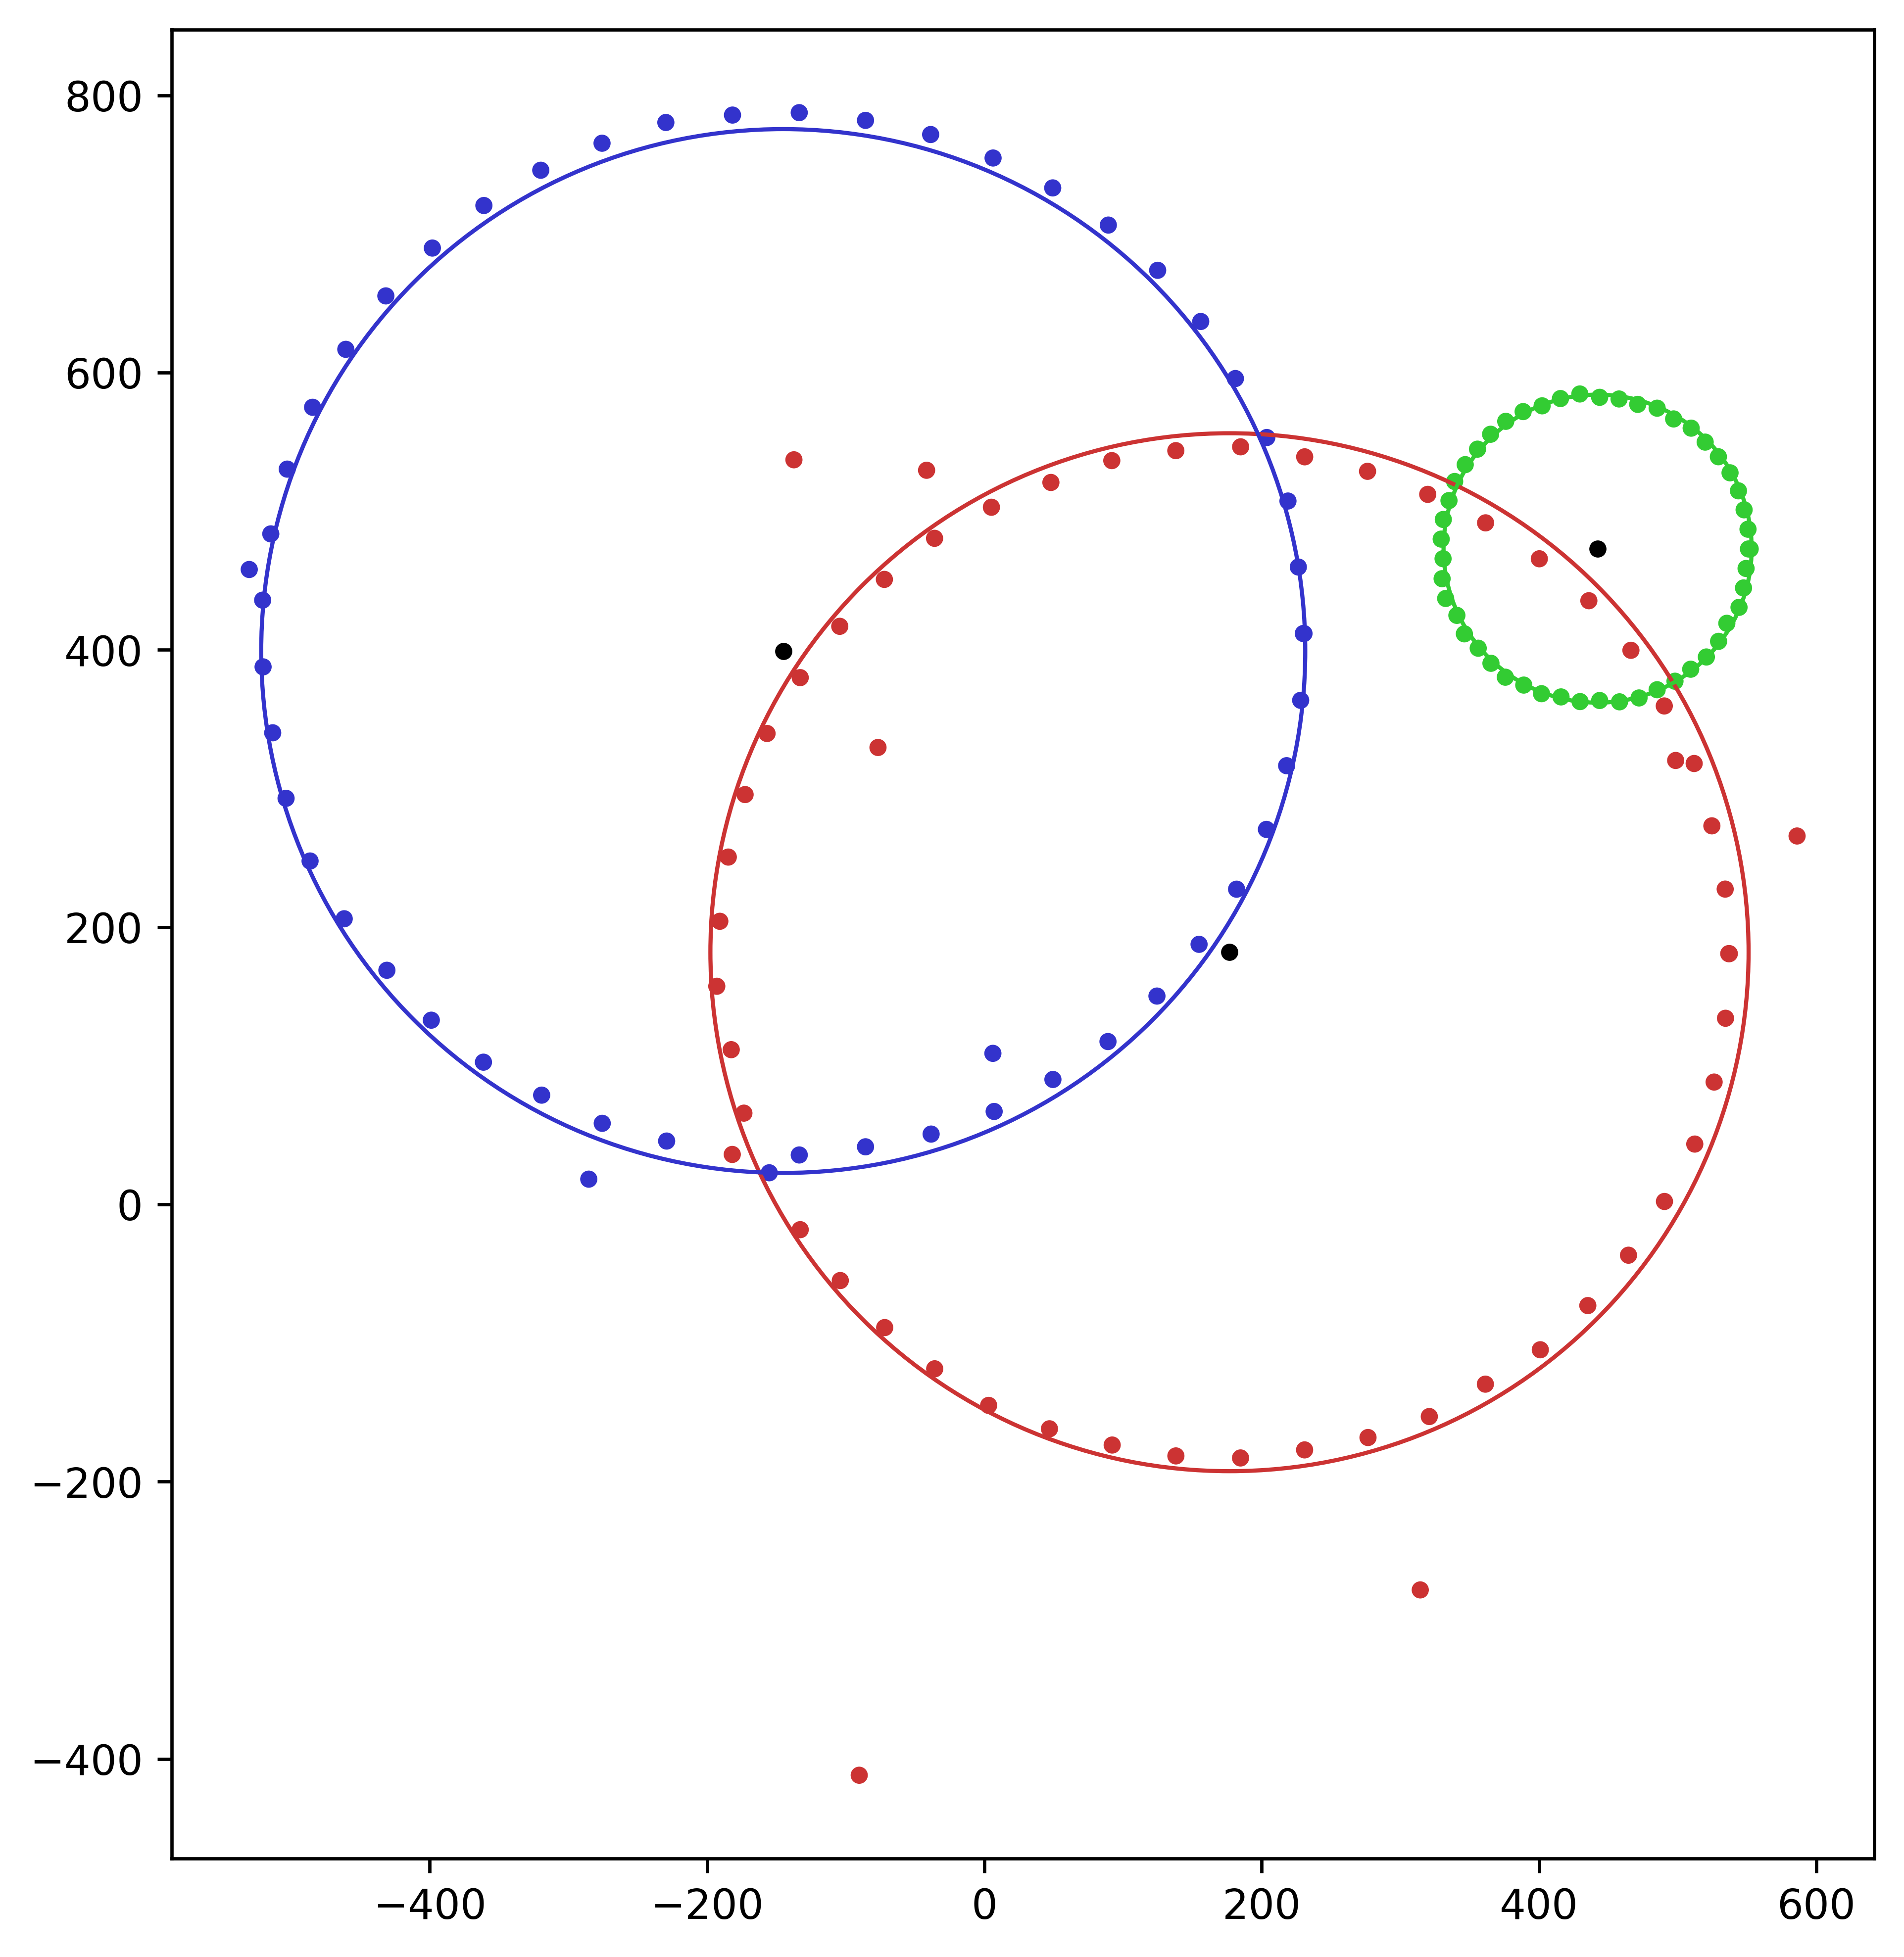

In [34]:
# ================ HELPERS ================
EXCENTRIC = np.array([[-600, -600], [-600, 600], [600, -600], [600, 600]])
CONCENTRIC = np.array([[0, 0], [0, 0], [0, 0], [0, 0]])
EXCENTRIC_CLOSE = np.array([[-100, -100], [-100, 100], [100, -100], [100, 100]])


# ================ RINGS PARAMETERS ================
CENTER_DELIMS = EXCENTRIC

MINMAX_RADIUS = np.array([100, 400])
N_RINGS = 3
CIRCLES_NOISE = 1
N_SAMPLES_PER_RING = 50

# ================ NOISE PARAMETERS ================
N_BACKGROUND_NOISE = 10
CENTER_DELIMS_NOISE = EXCENTRIC

# ================ ALGORITHM PARAMETERS ================
# "fuzzycmeans" or "concentric"
INIT_METHOD = "fuzzycmeans"
FUZINESS_PARAM = 1.1
CONVERGENCE_EPS = 0
MAX_ITERS = 5000
NOISE_DISTANCE_THRESHOLD = 50
APPLY_NOISE_REMOVAL = True

circles = random_circles(
    CENTER_DELIMS, MINMAX_RADIUS, N_SAMPLES_PER_RING, N_RINGS, noise=CIRCLES_NOISE
)

# Generate additional noise
noise = random_noise(CENTER_DELIMS_NOISE, N_BACKGROUND_NOISE)

# Combine circles and noise
circles = np.concatenate([circles, noise])


model = NoisyRingsClustering(
    n_rings=N_RINGS,
    q=FUZINESS_PARAM,
    convergence_eps=CONVERGENCE_EPS,
    max_iters=MAX_ITERS,
    noise_distance_threshold=NOISE_DISTANCE_THRESHOLD,
    apply_noise_removal=APPLY_NOISE_REMOVAL,
    init_method=INIT_METHOD,
)
model.fit(circles)

# mask = model.prune_noise(threshold=1.5, reestimate_centers_and_radii=False)
# Get the clustering results
# Get the clustering results
radii, centers, memberships = model.get_labels()

# Define distinct vibrant colors for each ring
vibrant_colors = get_vibrant_colors(N_RINGS)
# Ensure we have as many vibrant colors as we have rings
if len(vibrant_colors) < N_RINGS:
    raise ValueError("Not enough distinct vibrant colors for the number of rings")
fig = plot_results(
    circles, radii, centers, memberships, vibrant_colors, show_noise=True
)

In [37]:
NAME = "noise_bg"
save_experiment(
    model,
    circles,
    NAME,
    {n_background_noise: N_BACKGROUND_NOISE},
)

NameError: name 'n_background_noise' is not defined

In [ ]:
import matplotlib


def save_plot_to_tikz(name):
    old_backend = matplotlib.get_backend()
    matplotlib.use("pgf")
    fig.savefig(f"{name}.pgf")
    matplotlib.use(old_backend)


save_plot_to_tikz(NAME)

   ---------------------------------------- 0.0/54.2 kB ? eta -:--:--
   ------- -------------------------------- 10.2/54.2 kB ? eta -:--:--
   ---------------------------------------- 54.2/54.2 kB 697.0 kB/s eta 0:00:00


DEPRECATION: Loading egg at c:\users\dagom\anaconda3\envs\pytorch\lib\site-packages\huggingface_hub-0.22.0rc1-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
